# Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.

## Get the data 

Use the jupyter file from the last lab (Customer Analysis Round 3)

## Complete the following task 

1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2. Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution 
3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

##### Data Sources
- marketing_customer_analysis.csv: Got this dataset from Ironhack

##### Changes
- 09-09-2021: Updated Lab - Customer Analysis Round 4
    - Updated the code in the data cleaning process and added a histogram in EDA

# Lab | Data cleaning and wrangling
For this lab, we will be using the Marketing Customer Value Analysis database from before. Feel free to build on top of your previous notebooks, since there could be overlap with variable names.

## Instructions
This lab will focus on data cleaning and wrangling, this is a crucial step in the EDA process.

1. Remove the outliers in the dataset using one of the methods we've discussed by defining a function and applying it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables.
4. Encode the categorical variables
5. Transform the time variables (day, week and month) to integers.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

## Hint for Categorical Variables

- Use either encoding or get_dummies to deal with the categorical variables (example below):
```data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})```
- given that column "coverage" in the dataframe "data" has three categories:
- "basic", "extended", and "premium" and values are to be represented in the same order.

##### Data Sources
- marketing_customer_analysis.csv

#####  Changes
- 09-09-2021 Updated the whole lab
    - Removed outliers in the dataset and replaced it with nulls (we still need to impute them either with mean or median)
    - Created a copy of the dataframe for data wrangling(df1, nums1, cats1)
    - Normalized continuous data using MinMaxScaler
    - Encoded categorical variables (get_dummmies)
    - Still need to transform the time variables (days, week, and month) into intergers
    - Still need to merge/concatenate the dataframes all together

### Data Cleaning Process

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# import csv file
data=pd.read_csv('marketing_customer_analysis.csv')   
data.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [3]:
# let's rename data into df so it's easier to work with
df = data
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [4]:
# let's clean the column names and convert them into lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [5]:
# rename "employmentstatus" column into "employment status"
df.rename(columns = {"employmentstatus": "employment status"}, inplace=True)

In [6]:
# replace space with an underscore
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
# turn datetime into a right dtype
df["effective_to_date"] = pd.to_datetime(df["effective_to_date"])
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [8]:
# check for null values
df.isnull().sum()
# it's a clean dataset

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.

In [9]:
# explore the dtypes sorted by alphabetical order of columns
df.sort_index(axis=1).dtypes

coverage                                 object
customer                                 object
customer_lifetime_value                 float64
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy                                   object
policy_type                              object
renew_offer_type                         object
response                                 object
sales_channel                            object
state                                   

In [10]:
# get only the numerical data and assign it under "nums"
nums = df._get_numeric_data()
nums.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [11]:
# get only the columns with numerical values
nums.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [12]:
# check the class of nums and the dtypes within nums'columns
nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [13]:
# extract categorical values from df and assign it under "cats"
cats = df.select_dtypes('object')
cats.head()

customer       state response  coverage education employment_status gender  \
0  BU79786  Washington       No     Basic  Bachelor          Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor        Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor          Employed      F   
3  WW63253  California       No     Basic  Bachelor        Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor          Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

In [14]:
# we won't use cats.dtypes this time and will use cats.info() instead for better overview as it also shows more information
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer           9134 non-null   object
 1   state              9134 non-null   object
 2   response           9134 non-null   object
 3   coverage           9134 non-null   object
 4   education          9134 non-null   object
 5   employment_status  9134 non-null   object
 6   gender             9134 non-null   object
 7   location_code      9134 non-null   object
 8   marital_status     9134 non-null   object
 9   policy_type        9134 non-null   object
 10  policy             9134 non-null   object
 11  renew_offer_type   9134 non-null   object
 12  sales_channel      9134 non-null   object
 13  vehicle_class      9134 non-null   object
 14  vehicle_size       9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


#### Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

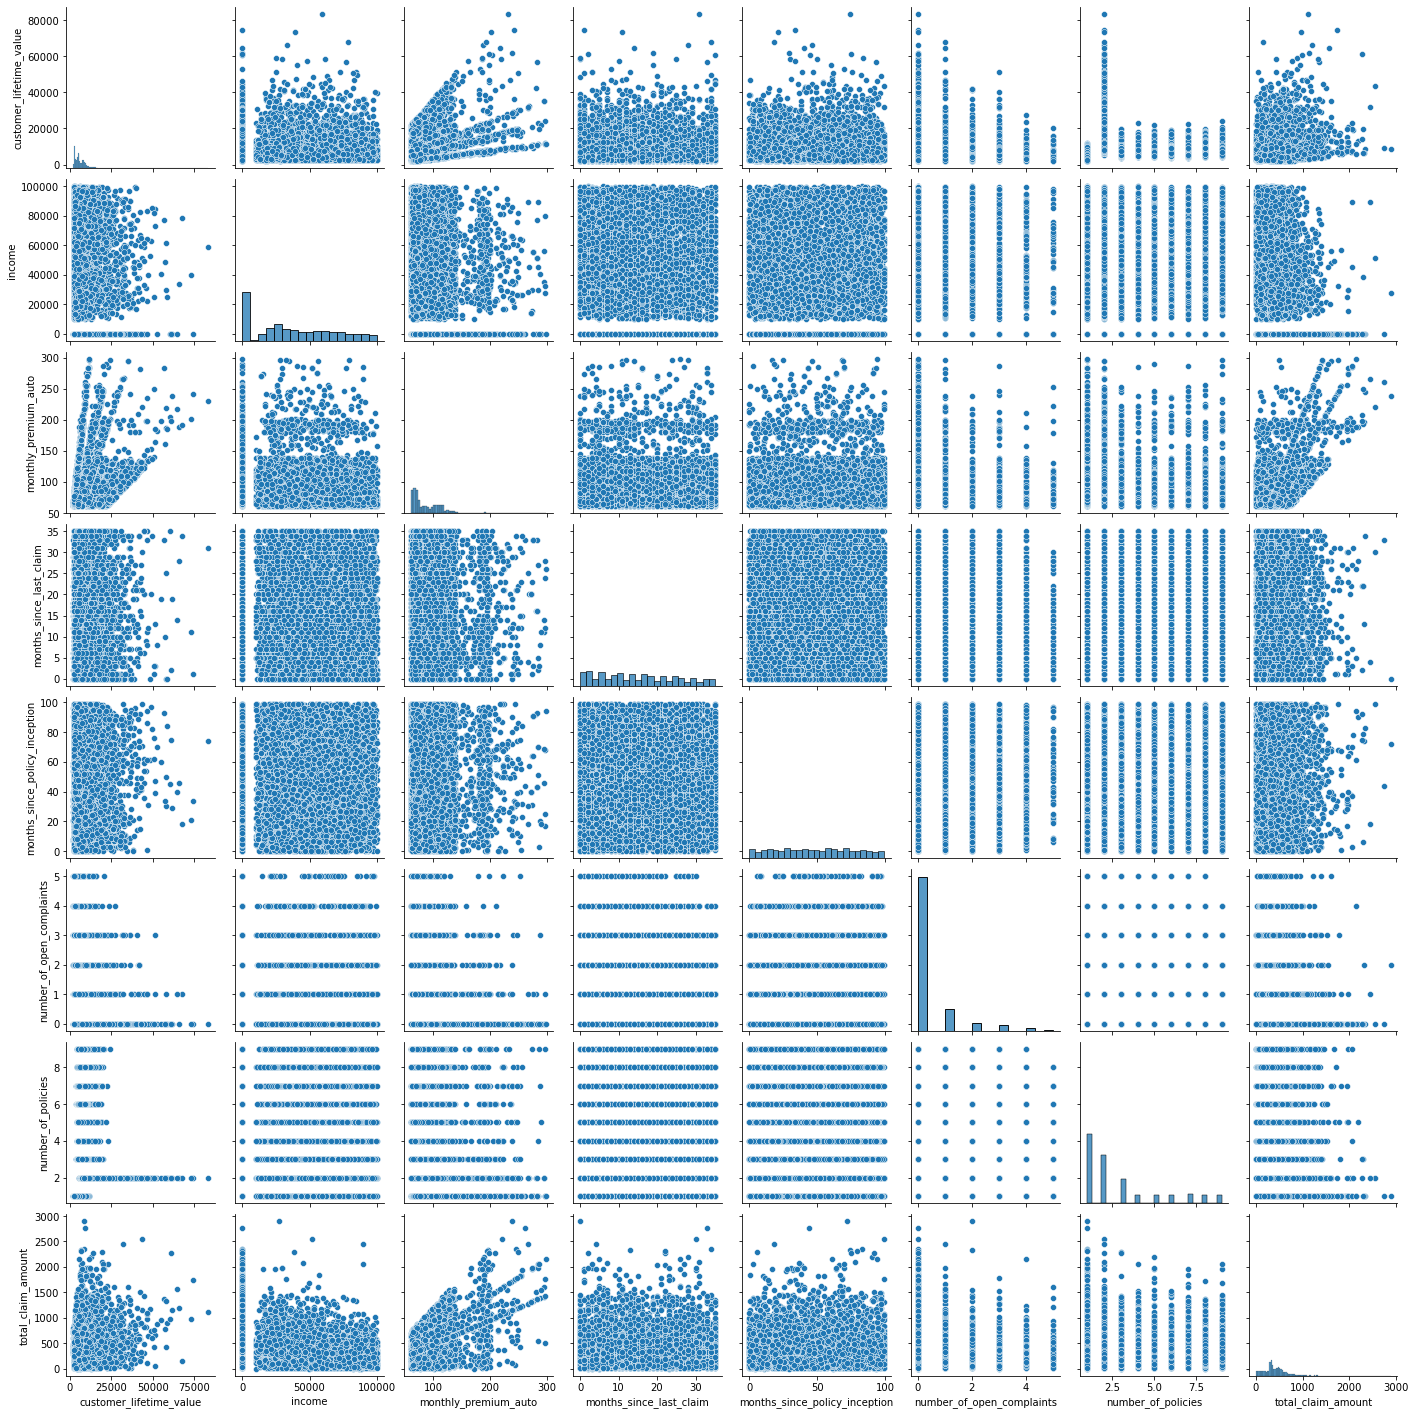

In [16]:
# Use seaborn library to construct distribution plots for the numerical variables
sns.pairplot(nums)

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

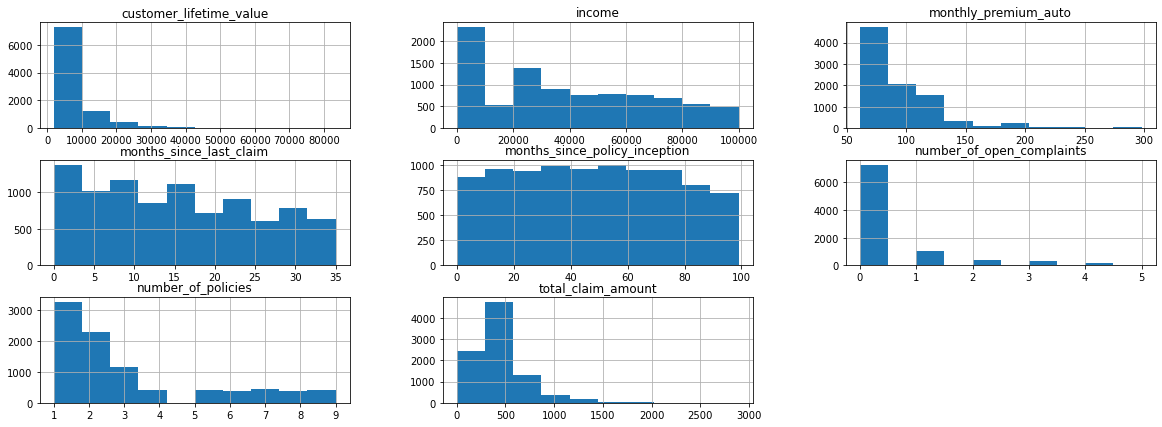

In [17]:
# Use Matlotlib to construct histograms
# generate a histogram for each column with numerical values in the dataframe
nums.hist(figsize=(20,7), bins=10)
# on the X-axis we have the data values of a column, on the Y-axis is the number of frequency 
# the distributions in the numerical variables do not look like a normal distribution

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [18]:
# check for correlations (write code for correlation matrix)
correlations = df.corr()
correlations
# or we run a sns.pairplot as we did previous cells above

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

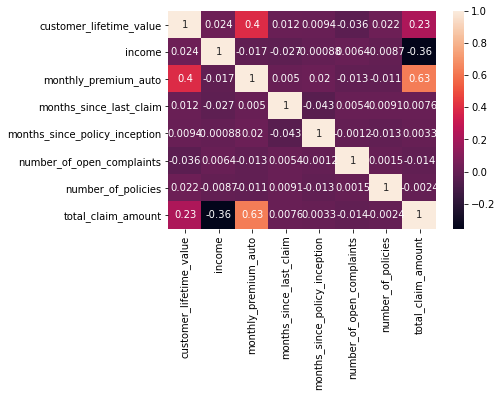

In [19]:
# Write code for seaborn heatmap √
sns.heatmap(correlations, annot=True)
plt.show()
# dark colours are low correlations
# light colours are high correlations
# to me it seems like there is no pair of features that have a high correlation (no greater than 0.9)

- Drop one of the two features that show a high correlation between them (greater than 0.9). √
- Write code for both the correlation matrix √ and for seaborn heatmap. √
- If there is no pair of features that have a high correlation, then do not drop any features √

# Lab | Data cleaning and wrangling
For this lab, we will be using the Marketing Customer Value Analysis database from before. Feel free to build on top of your previous notebooks, since there could be overlap with variable names.

## Instructions
This lab will focus on data cleaning and wrangling, this is a crucial step in the EDA process.

1. Remove the outliers in the dataset using one of the methods we've discussed by defining a function and applying it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables.
4. Encode the categorical variables
5. Transform the time variables (day, week and month) to integers.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

## Hint for Categorical Variables

- Use either encoding or get_dummies to deal with the categorical variables (example below):
```data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})```
- given that column "coverage" in the dataframe "data" has three categories:
- "basic", "extended", and "premium" and values are to be represented in the same order.

##### Data Sources
- marketing_customer_analysis.csv

#####  Changes
- 09-09-2021 Updated the whole lab
    - Removed outliers in the dataset and replaced it with nulls (we still need to impute them either with mean or median)
    - Created a copy of the dataframe for data wrangling(df1, nums1, cats1)
    - Normalized continuous data using MinMaxScaler
    - Encoded categorical variables (get_dummmies)
    - Still need to transform the time variables (days, week, and month) into intergers
    - Still need to merge/concatenate the dataframes all together

## Remove the outliers in the dataset using one of the methods we've discussed by defining a function and applying it to the dataframe.

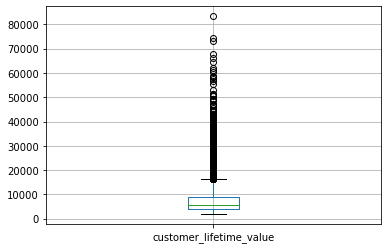

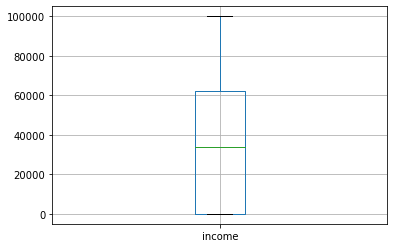

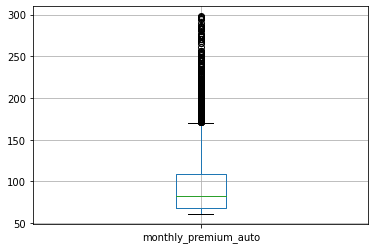

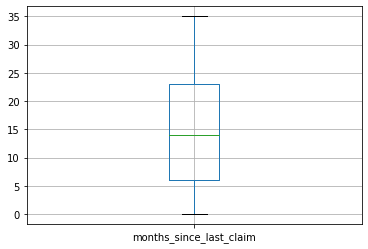

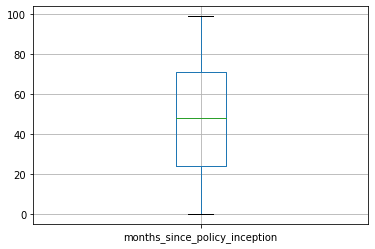

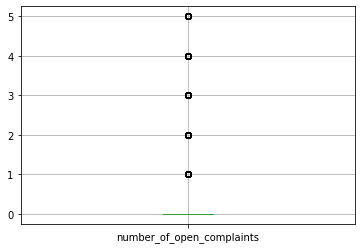

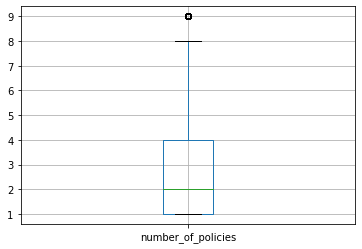

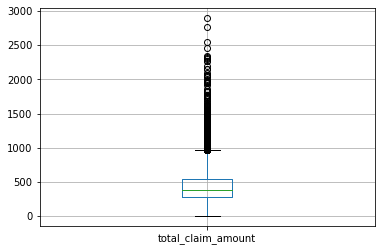

In [20]:
# write a for loop for boxplox to each column in nums
for column in nums:
    plt.figure()
    nums.boxplot([column], figsize=(20,7))
# let's check further for monthly_premium_auto, number_of_complaints, and income in the upcoming cells

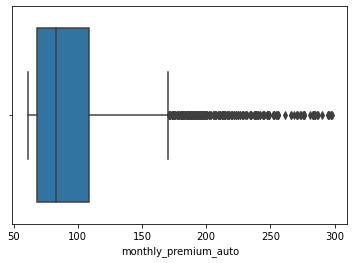

In [21]:
sns.boxplot(x=df['monthly_premium_auto']);
# a lot of outliers beyond the max

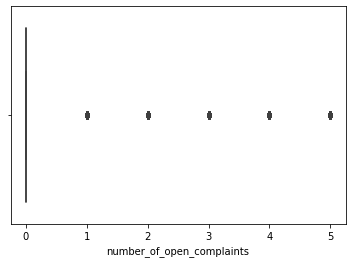

In [22]:
sns.boxplot(x=df['number_of_open_complaints']);
# ?????

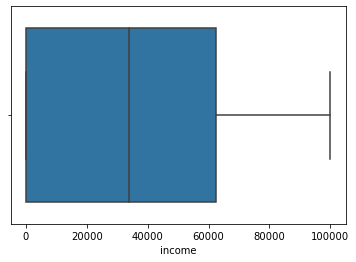

In [23]:
sns.boxplot(x=df['income']);
# the min is the same as q1

### Remove outliers using the IQR 

In [24]:
# calculate Q1, Q3
# evaluate the interquartile range, IQR = Q3 - Q1
# estimate the lower bound, the lower bound = q1*1.5
# estimate the upper bound, the upper bound = q3*1.5
# replace the outliers with NULL value 

# method 1: through defining a function and calling it
#def remove_outlier(nums, col_name):
    #q1 = nums[col_name].quantile(0.25)
    #q3 = nums[col_name].quantile(0.75)
    #iqr = q3-q1 #Interquartile range
    #fence_low  = q1-1.5*iqr
    #fence_high = q3+1.5*iqr
    #nums_out = nums.loc[(nums[col_name] > fence_low) & (nums[col_name] < fence_high)]
    #return nums_out

In [25]:
#remove_outlier(nums, "monthly_premium_auto"),
#remove_outlier(nums, "customer_lifetime_value"),
#remove_outlier(nums, "number_of_policies"),
#remove_outlier(nums, "total_claim_amount");

In [26]:
# method2: through for loop
for x in ['monthly_premium_auto']:
    q75,q25 = np.percentile(nums.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    nums.loc[nums[x] < min,x] = np.nan
    nums.loc[nums[x] > max,x] = np.nan

In [27]:
for x in ['customer_lifetime_value']:
    q75,q25 = np.percentile(nums.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    nums.loc[nums[x] < min,x] = np.nan
    nums.loc[nums[x] > max,x] = np.nan

In [28]:
for x in ['number_of_policies']:
    q75,q25 = np.percentile(nums.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    nums.loc[nums[x] < min,x] = np.nan
    nums.loc[nums[x] > max,x] = np.nan

In [29]:
for x in ['total_claim_amount']:
    q75,q25 = np.percentile(nums.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    nums.loc[nums[x] < min,x] = np.nan
    nums.loc[nums[x] > max,x] = np.nan

In [30]:
# check the nulls after IQR
nums.isnull().sum()

customer_lifetime_value          817
income                             0
monthly_premium_auto             430
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints          0
number_of_policies               416
total_claim_amount               453
dtype: int64

In [31]:
# check the % of nulls 
df.isnull().sum() * 100 / len(df)

# you need to impute the nulls 
# more here https://www.askpython.com/python/examples/impute-missing-data-values

customer                         0.000000
state                            0.000000
customer_lifetime_value          8.944603
response                         0.000000
coverage                         0.000000
education                        0.000000
effective_to_date                0.000000
employment_status                0.000000
gender                           0.000000
income                           0.000000
location_code                    0.000000
marital_status                   0.000000
monthly_premium_auto             0.000000
months_since_last_claim          0.000000
months_since_policy_inception    0.000000
number_of_open_complaints        0.000000
number_of_policies               0.000000
policy_type                      0.000000
policy                           0.000000
renew_offer_type                 0.000000
sales_channel                    0.000000
total_claim_amount               4.959492
vehicle_class                    0.000000
vehicle_size                     0

## Create a copy of the dataframe for the data wrangling.

In [32]:
# copy the dataframes
df1 = pd.DataFrame.copy(df, deep=True)
nums1 = pd.DataFrame.copy(nums, deep=True)
cats1 = pd.DataFrame.copy(cats, deep=True)

## Normalize the continuous variables.

In [36]:
from sklearn import preprocessing
# scale the features using MinMax scaler (Normalization)
# Scale and plot the features against Weekly_Sales (target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()
col_name = nums1.columns[:]
X = nums1.loc[:, col_name]

# Normalizing X and turning it into a DataFrame
X = pd.DataFrame(data = min_max_scaler.fit_transform(X), columns = col_name)

# Examine the normalized data
X.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                 0.059651  0.562847              0.073394   
1                 0.350217  0.000000              0.302752   
2                 0.757387  0.487763              0.431193   
3                 0.396140  0.000000              0.412844   
4                 0.063109  0.438443              0.110092   

   months_since_last_claim  months_since_policy_inception  \
0                 0.914286                       0.050505   
1                 0.371429                       0.424242   
2                 0.514286                       0.383838   
3                 0.514286                       0.656566   
4                 0.342857                       0.444444   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                        0.0            0.000000            0.400735  
1                        0.0            1.000000                 NaN  
2                        0.0            0.142857            0.589962  
3                        0.0            0.857143            0.551847  
4                        0.0            0.000000            0.143781

## Encode the categorical variables

In [ ]:
cats1.columns

In [ ]:
# we are replacing original values with dummie values as part of the normalisation process
categorical = pd.get_dummies(cats1, columns = ['customer', 'state', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'], drop_first=True)
categorical.head()

## Transform the time variables (day, week and month) to integers.

In [ ]:
df1.head()

In [37]:
from datetime import datetime
df1["effective_to_date"] = df1["effective_to_date"].dt.strftime(""%d%w%m")

SyntaxError: EOL while scanning string literal (<ipython-input-37-e070bb736bc6>, line 2)